# Homework 2: 

##  Machine Learning for Regression 2024
___

#### STEP 1: Import the necessary libraries, and load the data
____

In [1350]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load the data
df = pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [1351]:
# Nornalise the column names

df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [1352]:
# keeping the data with the interested columns
interested_columns = ['ram', 'storage', 'screen', 'final_price']

df = df[interested_columns]
df.reset_index(drop=True, inplace=True)
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [1353]:
# Checking the data types
df.dtypes

ram              int64
storage          int64
screen         float64
final_price    float64
dtype: object

<AxesSubplot:xlabel='final_price', ylabel='Count'>

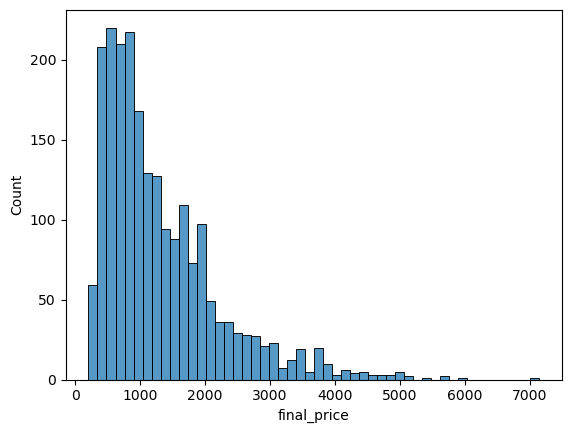

In [1354]:
sns.histplot(df.final_price, bins=50)

####  STEP 2: Prepare and split the dataset
___

In [1355]:
# 1. check the count of the data set
n = len(df)


# 2. Turning the dataset (n) into nupy arrays, and assigning the values to the variables
idx = np.arange(n)


# 3. Shuffling the data, and setting the random seed to 42 for reproducibility
np.random.seed(42)
np.random.shuffle(idx)


# 4. Splitting the data into train, validation, and test sets
n = len(df) # total number of samples
n_val = int(n * 0.2) # 20% of the dataset
n_test = int(n * 0.2) # 20% of the dataset
n_train = n - (n_val) - (n_test) # 60% of the dataset

# 5. After the shuffling, apply the shuffling data set to the train, val and test data
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]


# 6. Resetting the index of the data
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [1356]:
# Checking the train data
df_train.head()

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00


In [1357]:
# Checking the validation data
df_val.head()

,ram,storage,screen,final_price
0,32,1000,16.0,2599.00
1,16,512,15.6,999.00
2,12,512,15.6,477.28
3,8,256,13.6,1519.00
4,8,512,15.6,402.99


In [1358]:
# Checking the test data
df_test.head()

,ram,storage,screen,final_price
0,32,1000,15.6,4805.65
1,16,512,13.0,2189.00
2,16,512,15.6,1349.00
3,16,512,15.0,2175.83
4,16,1000,15.6,1248.59


In [1359]:
# checking the length of the train, val and test data
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [1360]:
# applying the log transformation to the target variable
y_train = np.log1p(df_train['final_price'].values)
y_val = np.log1p(df_val['final_price'].values)
y_test = np.log1p(df_test['final_price'].values)

In [1361]:
# deleting the median_house_value column from the train, val and test data
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

_____

### Question 1:

There's one feature with missing values. What is it?
- 'ram'
- 'storage'
- 'screen'
- 'final_price'

Answer: screen

In [1362]:
# checking for missing values
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

_____

### Question 2:

What's the median (50% percentile) for variable 'population'?

In [1363]:
# calculating the descriptive statistics of the numerical columns
median_ram = summary = df['ram'].describe()
median_raam = summary['50%']
print("Median (50% percentile) for 'ram':", median_ram)

Median (50% percentile) for 'ram': count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64


_____

###  Question 3:


* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

____

In [1364]:
# prepare a function to fill the missing values in the numerical columns
def filling_missing_value_0(df):
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X

In [1365]:
# prepare a function to fill the missing values in the numerical columns
def filling_missing_value_mean(df):
    df = df.copy()
    df = df.fillna(df.mean())
    X = df.values
    return X

____

#### 3.1 Filling missing values with mean: x_train. 

In [1366]:
# checking the missing values in the train data
df_train.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [1367]:
# applying the filling_missing_value_mean function to the train, val and test data
x_train = filling_missing_value_mean(df_train)
x_train.shape

(1296, 3)

In [1368]:
# linaer regression model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [1369]:
# calling the train_linear_regression function
w0, w = train_linear_regression(x_train, y_train)

w0, w

(6.855566544142249, array([ 0.02650252,  0.00066643, -0.04534341]))

In [1370]:
# calling the pred function y = w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5
y_pred = w0 + x_train.dot(w)
list[y_pred, y_train]

list[array([7.662716  , 6.36488586, 7.73526545, ..., 6.91345982, 6.98600927,
       6.98600927]), array([7.024907  , 5.30851519, 6.90649448, ..., 6.96602419, 7.42177579,
       6.96318999])]

<AxesSubplot:ylabel='Count'>

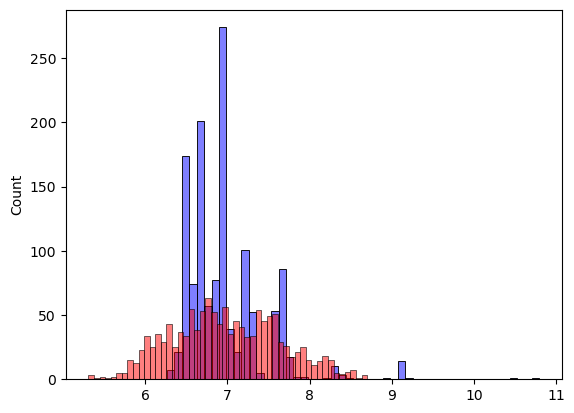

In [1371]:
# checking the outcome of the y-pred vs the y_train
sns.histplot(y_pred, color='blue', alpha=0.5, bins=50)
sns.histplot(y_train, color='red', alpha=0.5, bins=50)

In [1372]:
# writing a function to calculate the RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [1373]:
# calling the rmse function
rmse(y_train, y_pred).round(2)

0.45

#### 3.2 Filling missing values with xero: x_train

In [1374]:
# checking the missing values in the x_val data
df_train.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [1375]:
# applying the filling_missing_value_0 function to the train, val and test data
x_train = filling_missing_value_0(df_train)
x_train.shape

(1296, 3)

In [1376]:
# calling the pred function y = w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5
y_pred = w0 + x_train.dot(w)
y_pred

array([7.662716  , 6.36488586, 7.73526545, ..., 6.91345982, 6.98600927,
       6.98600927])

<AxesSubplot:ylabel='Count'>

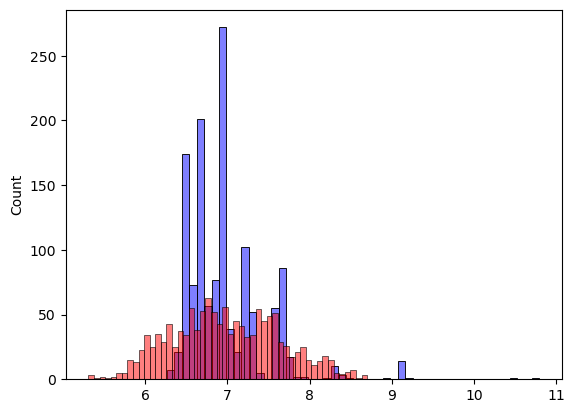

In [1377]:
# checking the outcome of the y-pred vs the y_train
sns.histplot(y_pred, color='blue', alpha=0.5, bins=50)
sns.histplot(y_train, color='red', alpha=0.5, bins=50)

In [1378]:
# writing a function to calculate the RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [1379]:
# calling the rmse function
rmse(y_train, y_pred).round(2)

0.45

#### 3.3 RMSE on validation data: Filling missing values with mean

In [1380]:
# checking the missing values in the x_val data
df_val.isnull().sum()

ram        0
storage    0
screen     1
dtype: int64

In [1381]:
# finding the missing values in the x_val data
x_val = filling_missing_value_mean(df_val)
x_val

array([[  32. , 1000. ,   16. ],
       [  16. ,  512. ,   15.6],
       [  12. ,  512. ,   15.6],
       ...,
       [   8. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ],
       [   4. ,   64. ,   14. ]])

In [1382]:
# mutlipling the X_val with the w values
y_pred = w0 + x_val.dot(w)

In [1383]:
# calling the rmse function
rmse(y_val, y_pred)

0.43117372937299364

#### 3.4 RMSE on validation data: Filling missing values with zero

In [1384]:
# checking the missing values in the x_val data
df_val.isnull().sum()


ram        0
storage    0
screen     1
dtype: int64

In [1385]:
# finding the missing values in the x_val data
x_val = filling_missing_value_0(df_val)
x_val

array([[  32. , 1000. ,   16. ],
       [  16. ,  512. ,   15.6],
       [  12. ,  512. ,   15.6],
       ...,
       [   8. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ],
       [   4. ,   64. ,   14. ]])

In [1386]:
# mutlipling the X_val with the w values
y_pred = w0 + x_val.dot(w)

In [1387]:
# calling the rmse function
rmse(y_val, y_pred)

0.4290504340343253

______

### Question 4: 

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?


In [1388]:
# calling the df_train data, and checking the missing values
df_train.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [1389]:
# reguralization model for the linear regression
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [1390]:
# calling the train_linear_regression_reg function
for r in [0, 0.01, 0.1, 1, 5, 10,100]:
    x_train = filling_missing_value_0(df_train)
    w0, w = train_linear_regression_reg(x_train, y_train, r=r)

    x_val = filling_missing_value_0(df_val)
    y_pred = w0 + x_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r,':', w0,':', score)

0 : 6.727163706117667 : 0.4288635315474385
0.01 : 6.721004333265395 : 0.4288516360534052
0.1 : 6.666075503833033 : 0.4287756009707549
1 : 6.162616499464744 : 0.4305932989742992
5 : 4.61608617649895 : 0.46320952575801033
10 : 3.516754720793881 : 0.5075657769236759
100 : 0.6849263362656987 : 0.6735026061726094


In [1391]:
# selecting the best r value
r = 0.1
x_train = filling_missing_value_0(df_train)
w0, w = train_linear_regression_reg(x_train, y_train, r=r)

x_val = filling_missing_value_0(df_val)
y_pred = w0 + x_val.dot(w)
score = rmse(y_val, y_pred).round(2)

print(score)

0.43


____

### Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [1392]:
# setting up a function to prepare the data

def prepare_data(df, seed_value):
    
    print(f"Seed value: {seed_value }")
    print()
    
    # 1. Check the count of the dataset
    n = len(df)

    # 2. Create numpy array of indices
    idx = np.arange(n)

    # 3. Set the random seed and shuffle the indices
    np.random.seed(seed_value)
    np.random.shuffle(idx)

    # 4. Split the data into train, validation, and test sets
    n_val = int(n * 0.2)  # 20% of the dataset
    n_test = int(n * 0.2)  # 20% of the dataset
    n_train = n - n_val - n_test  # 60% of the dataset


    # 5. Apply the shuffled indices to split the dataset
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    # 6. Reset the indices of the train, val, and test sets
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # 7. Apply log transformation to the target variable
    y_train = np.log1p(df_train['final_price'].values)
    y_val = np.log1p(df_val['final_price'].values)
    y_test = np.log1p(df_test['final_price'].values)

    # 8. Delete the target column ('final_price') from the data
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    

    return df_train, df_val, df_test, y_train, y_val, y_test

_____

#### 5.1 Dataset split with seed 0

Seed value: 0

The x_train data shape (1296, 3)

The y_pred values: [6.82135851 6.9767568  7.58797119 ... 7.65110495 7.71052496 6.9767568 ]

The rmse value: 0.45


<AxesSubplot:ylabel='Count'>

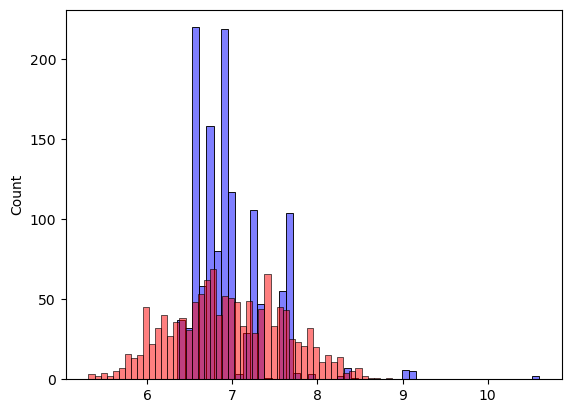

In [1348]:

# splitting the data into train, val and test data, and setting the random seed
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, seed_value=0)


# applying the filling_missing_value_o function to the data, turn it into array, and checking the shape
x_train= filling_missing_value_mean(df_train)
print('The x_train data shape',x_train.shape)
print()

# calling the pred function y = w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5
y_pred = w0 + x_train.dot(w)
print('The y_pred values:', y_pred)
print()


# calling the rmse function
rmse(y_train, y_pred).round(2)
print('The rmse value:', rmse(y_train, y_pred).round(2))

# checking the outcome of the y-pred vs the y_train
sns.histplot(y_pred, color='blue', alpha=0.5, bins=50)
sns.histplot(y_train, color='red', alpha=0.5, bins=50)

In [1334]:
# RMSE on validation data: Filling missing values with zero

# finding the missing values in the x_val data
x_val = filling_missing_value_mean(df_val)


# mutlipling the X_val with the w values
y_pred = w0 + x_val.dot(w)


# calling the rmse function
rmse(y_val, y_pred)
print('The rmse value:', rmse(y_val, y_pred))

The rmse value: 0.42961039365804055


#### 5.1 Dataset split with seed 1

Seed value: 1
The x_train data shape (1296, 3)

The y_pred values: [7.69566995 7.2671918  6.9173368  ... 6.72538022 6.54184973 7.65110495]

The rmse value: 0.44


<AxesSubplot:ylabel='Count'>

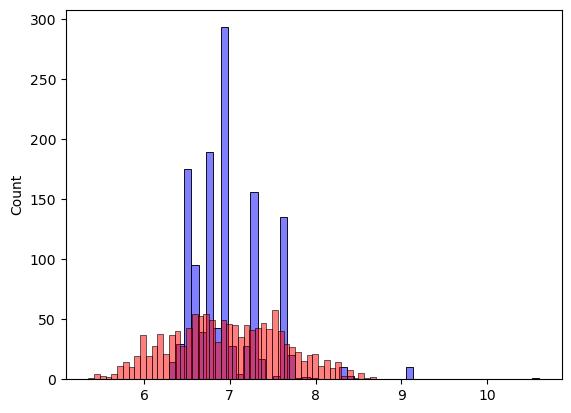

In [1338]:

# splitting the data into train, val and test data, and setting the random seed
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, seed_value=1)


# applying the filling_missing_value_o function to the data, turn it into array, and checking the shape
x_train = filling_missing_value_mean(df_train)
print('The x_train data shape',x_train.shape)
print()

# calling the pred function y = w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5
y_pred = w0 + x_train.dot(w)
print('The y_pred values:', y_pred)
print()


# calling the rmse function
rmse(y_train, y_pred).round(2)
print('The rmse value:', rmse(y_train, y_pred).round(2))

# checking the outcome of the y-pred vs the y_train
sns.histplot(y_pred, color='blue', alpha=0.5, bins=50)
sns.histplot(y_train, color='red', alpha=0.5, bins=50)

In [1304]:
# RMSE on validation data: Filling missing values with zero

# finding the missing values in the x_val data
x_val = filling_missing_value_mean(df_val)
print('The x_val data:', x_val)


# mutlipling the X_val with the w values
y_pred = w0 + x_val.dot(w)


# calling the rmse function
rmse(y_val, y_pred)
print('The rmse value:', rmse(y_val, y_pred))

The x_val data: [[  16.   512.    14. ]
 [  16.   512.    17.3]
 [  16.  1000.    14. ]
 ...
 [  16.   512.    15.6]
 [  16.  1000.    16.1]
 [   8.   256.    13.6]]
The rmse value: 0.45060004163939704


#### 5.1 Dataset split with seed 2

Seed value: 2
The count of the dataset: 2160

The numpy array of the dataset indices: [   0    1    2 ... 2157 2158 2159]

Validation data: 432
Test data: 432
Training data: 1296
Total data: 2160

The x_train data shape (1296, 3)

The y_pred values: [7.64645009 6.9246293  6.71772064 ... 6.5396425  6.53961637 7.64645009]

The rmse value: 0.44


<AxesSubplot:ylabel='Count'>

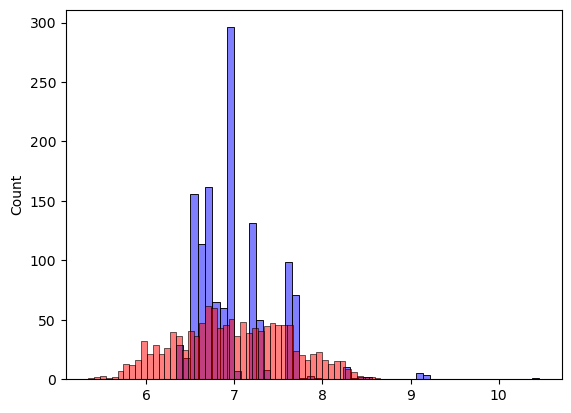

In [1305]:

# splitting the data into train, val and test data, and setting the random seed
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, seed_value=2)


# applying the filling_missing_value_o function to the data, turn it into array, and checking the shape
x_train = filling_missing_value_mean(df_train)
print('The x_train data shape',x_train.shape)
print()

# calling the pred function y = w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5
y_pred = w0 + x_train.dot(w)
print('The y_pred values:', y_pred)
print()


# calling the rmse function
rmse(y_train, y_pred).round(2)
print('The rmse value:', rmse(y_train, y_pred).round(2))

# checking the outcome of the y-pred vs the y_train
sns.histplot(y_pred, color='blue', alpha=0.5, bins=50)
sns.histplot(y_train, color='red', alpha=0.5, bins=50)

In [1306]:
# RMSE on validation data: Filling missing values with zero

# finding the missing values in the x_val data
x_val = filling_missing_value_mean(df_val)
print('The x_val data:', x_val)


# mutlipling the X_val with the w values
y_pred = w0 + x_val.dot(w)


# calling the rmse function
rmse(y_val, y_pred)
print('The rmse value:', rmse(y_val, y_pred))

The x_val data: [[  32.  1000.    17. ]
 [   8.   512.    15.3]
 [   8.   512.    15.6]
 ...
 [   8.   256.    15.6]
 [   8.   256.    15.6]
 [  32.  1000.    17. ]]
The rmse value: 0.44713293356829825


#### 5.1 Dataset split with seed 3

Seed value: 3
The count of the dataset: 2160

The numpy array of the dataset indices: [   0    1    2 ... 2157 2158 2159]

Validation data: 432
Test data: 432
Training data: 1296
Total data: 2160

The x_train data shape (1296, 3)

The y_pred values: [6.75979948 6.91815563 6.91815563 ... 6.61408968 7.65939743 6.61408968]

The rmse value: 0.44


<AxesSubplot:ylabel='Count'>

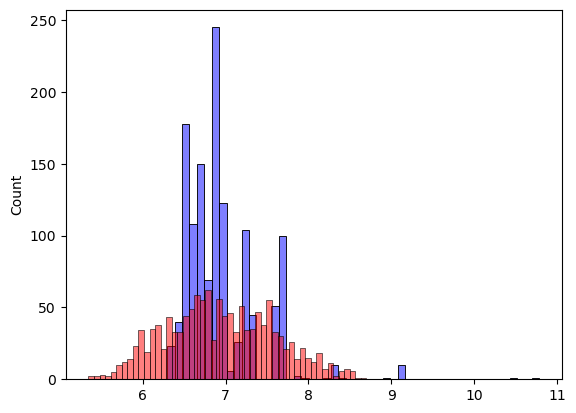

In [1307]:

# splitting the data into train, val and test data, and setting the random seed
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, seed_value=3)


# applying the filling_missing_value_o function to the data, turn it into array, and checking the shape
x_train = filling_missing_value_mean(df_train)
print('The x_train data shape',x_train.shape)
print()

# calling the pred function y = w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5
y_pred = w0 + x_train.dot(w)
print('The y_pred values:', y_pred)
print()


# calling the rmse function
rmse(y_train, y_pred).round(2)
print('The rmse value:', rmse(y_train, y_pred).round(2))

# checking the outcome of the y-pred vs the y_train
sns.histplot(y_pred, color='blue', alpha=0.5, bins=50)
sns.histplot(y_train, color='red', alpha=0.5, bins=50)

In [1308]:
# RMSE on validation data: Filling missing values with zero

# finding the missing values in the x_val data
x_val = filling_missing_value_mean(df_val)
print('The x_val data:', x_val)


# mutlipling the X_val with the w values
y_pred = w0 + x_val.dot(w)


# calling the rmse function
rmse(y_val, y_pred)
print('The rmse value:', rmse(y_val, y_pred))

The x_val data: [[  16.   512.    15.6]
 [   8.   256.    15.6]
 [   8.   512.    15.6]
 ...
 [  16.  1000.    15.6]
 [  16.   512.    14. ]
 [  16.  1000.    17.3]]
The rmse value: 0.44450154195088704


#### 5.1 Dataset split with seed 4

Seed value: 4
The count of the dataset: 2160

The numpy array of the dataset indices: [   0    1    2 ... 2157 2158 2159]

Validation data: 432
Test data: 432
Training data: 1296
Total data: 2160

The x_train data shape (1296, 3)

The y_pred values: [6.91815563 6.75979948 6.42306421 ... 7.31031679 6.99260282 7.88384518]

The rmse value: 0.44


<AxesSubplot:ylabel='Count'>

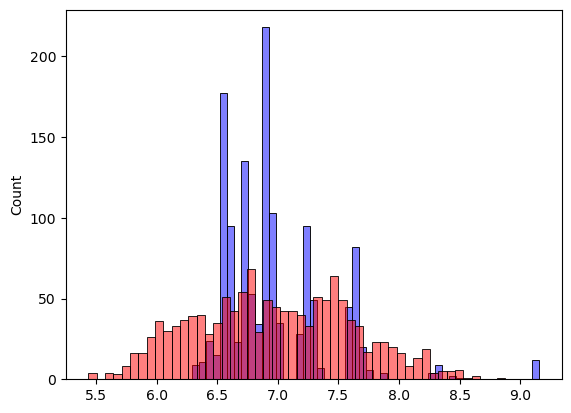

In [1309]:

# splitting the data into train, val and test data, and setting the random seed
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, seed_value=4)


# applying the filling_missing_value_o function to the data, turn it into array, and checking the shape
x_train = filling_missing_value_mean(df_train)
print('The x_train data shape',x_train.shape)
print()

# calling the pred function y = w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5
y_pred = w0 + x_train.dot(w)
print('The y_pred values:', y_pred)
print()


# calling the rmse function
rmse(y_train, y_pred).round(2)
print('The rmse value:', rmse(y_train, y_pred).round(2))

# checking the outcome of the y-pred vs the y_train
sns.histplot(y_pred, color='blue', alpha=0.5, bins=50)
sns.histplot(y_train, color='red', alpha=0.5, bins=50)

In [1310]:
# RMSE on validation data: Filling missing values with zero

# finding the missing values in the x_val data
x_val = filling_missing_value_mean(df_val)
print('The x_val data:', x_val)


# mutlipling the X_val with the w values
y_pred = w0 + x_val.dot(w)


# calling the rmse function
rmse(y_val, y_pred)
print('The rmse value:', rmse(y_val, y_pred))

The x_val data: [[  32.  3000.    17.3]
 [  32.  1000.    16. ]
 [   8.   256.    13.3]
 ...
 [  32.  1000.    15.6]
 [  64.  1000.    16. ]
 [  16.   512.    13.3]]
The rmse value: 0.42241871441248996


#### 5.1 Dataset split with seed 5

Seed value: 5
The count of the dataset: 2160

The numpy array of the dataset indices: [   0    1    2 ... 2157 2158 2159]

Validation data: 432
Test data: 432
Training data: 1296
Total data: 2160

The x_train data shape (1296, 3)

The y_pred values: [6.70801013 6.96994498 6.91815563 ... 9.10263932 6.90520829 6.6950628 ]

The rmse value: 0.45


<AxesSubplot:ylabel='Count'>

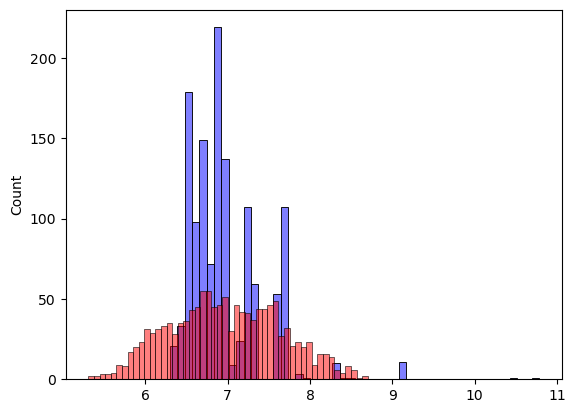

In [1311]:

# splitting the data into train, val and test data, and setting the random seed
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, seed_value=5)


# applying the filling_missing_value_o function to the data, turn it into array, and checking the shape
x_train = filling_missing_value_mean(df_train)
print('The x_train data shape',x_train.shape)
print()

# calling the pred function y = w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5
y_pred = w0 + x_train.dot(w)
print('The y_pred values:', y_pred)
print()


# calling the rmse function
rmse(y_train, y_pred).round(2)
print('The rmse value:', rmse(y_train, y_pred).round(2))

# checking the outcome of the y-pred vs the y_train
sns.histplot(y_pred, color='blue', alpha=0.5, bins=50)
sns.histplot(y_train, color='red', alpha=0.5, bins=50)

In [1312]:
# RMSE on validation data: Filling missing values with zero

# finding the missing values in the x_val data
x_val = filling_missing_value_mean(df_val)
print('The x_val data:', x_val)


# mutlipling the X_val with the w values
y_pred = w0 + x_val.dot(w)


# calling the rmse function
rmse(y_val, y_pred)
print('The rmse value:', rmse(y_val, y_pred))

The x_val data: [[  8.  512.   15.6]
 [ 16.  512.   15.6]
 [  8.  512.   14. ]
 ...
 [  4.  256.   15.6]
 [ 16.  500.   15.6]
 [  8.  128.   13.3]]
The rmse value: 0.42324433084438035


#### 5.1 Dataset split with seed 6

Seed value: 6
The count of the dataset: 2160

The numpy array of the dataset indices: [   0    1    2 ... 2157 2158 2159]

Validation data: 432
Test data: 432
Training data: 1296
Total data: 2160

The x_train data shape (1296, 3)

The y_pred values: [7.65939743 6.36008337 6.5396425  ... 6.91815563 6.70801013 6.96994498]

The rmse value: 0.44


<AxesSubplot:ylabel='Count'>

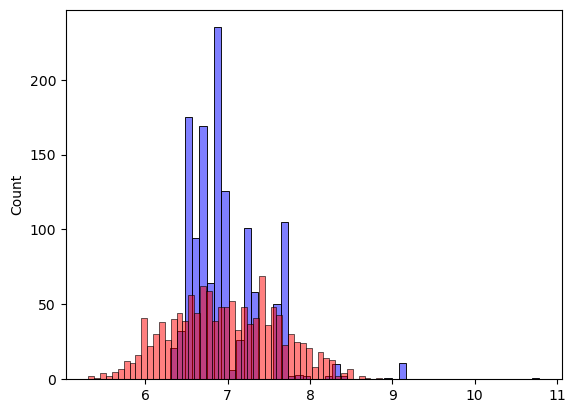

In [1313]:

# splitting the data into train, val and test data, and setting the random seed
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, seed_value=6)


# applying the filling_missing_value_o function to the data, turn it into array, and checking the shape
x_train = filling_missing_value_mean(df_train)
print('The x_train data shape',x_train.shape)
print()

# calling the pred function y = w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5
y_pred = w0 + x_train.dot(w)
print('The y_pred values:', y_pred)
print()


# calling the rmse function
rmse(y_train, y_pred).round(2)
print('The rmse value:', rmse(y_train, y_pred).round(2))

# checking the outcome of the y-pred vs the y_train
sns.histplot(y_pred, color='blue', alpha=0.5, bins=50)
sns.histplot(y_train, color='red', alpha=0.5, bins=50)

In [1314]:
# RMSE on validation data: Filling missing values with zero

# finding the missing values in the x_val data
x_val = filling_missing_value_mean(df_val)
print('The x_val data:', x_val)


# mutlipling the X_val with the w values
y_pred = w0 + x_val.dot(w)


# calling the rmse function
rmse(y_val, y_pred)
print('The rmse value:', rmse(y_val, y_pred))

The x_val data: [[  32. 1000.   16.]
 [  16.  512.   14.]
 [  16.  512.   16.]
 ...
 [  16.  512.   14.]
 [  32. 1000.   16.]
 [  32. 1000.   17.]]
The rmse value: 0.44083140601038767


#### 5.1 Dataset split with seed 7

Seed value: 7
The count of the dataset: 2160

The numpy array of the dataset indices: [   0    1    2 ... 2157 2158 2159]

Validation data: 432
Test data: 432
Training data: 1296
Total data: 2160

The x_train data shape (1296, 3)

The y_pred values: [6.5396425  7.31031679 6.53961637 ... 6.96994498 6.70801013 6.75979948]

The rmse value: 0.44


<AxesSubplot:ylabel='Count'>

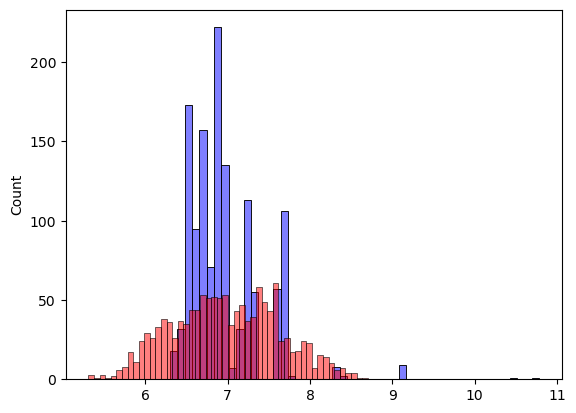

In [1315]:

# splitting the data into train, val and test data, and setting the random seed
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, seed_value=7)


# applying the filling_missing_value_o function to the data, turn it into array, and checking the shape
x_train = filling_missing_value_mean(df_train)
print('The x_train data shape',x_train.shape)
print()

# calling the pred function y = w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5
y_pred = w0 + x_train.dot(w)
print('The y_pred values:', y_pred)
print()


# calling the rmse function
rmse(y_train, y_pred).round(2)
print('The rmse value:', rmse(y_train, y_pred).round(2))

# checking the outcome of the y-pred vs the y_train
sns.histplot(y_pred, color='blue', alpha=0.5, bins=50)
sns.histplot(y_train, color='red', alpha=0.5, bins=50)

In [1316]:
# RMSE on validation data: Filling missing values with zero

# finding the missing values in the x_val data
x_val = filling_missing_value_mean(df_val)
print('The x_val data:', x_val)


# mutlipling the X_val with the w values
y_pred = w0 + x_val.dot(w)


# calling the rmse function
rmse(y_val, y_pred)
print('The rmse value:', rmse(y_val, y_pred))

The x_val data: [[   8.   512.    15.6]
 [  16.   512.    15.6]
 [   8.   512.    16. ]
 ...
 [  16.  1000.    15.6]
 [   8.   512.    15.6]
 [   8.   512.    15.6]]
The rmse value: 0.43112046643906954


#### 5.1 Dataset split with seed 8

Seed value: 8
The count of the dataset: 2160

The numpy array of the dataset indices: [   0    1    2 ... 2157 2158 2159]

Validation data: 432
Test data: 432
Training data: 1296
Total data: 2160

The x_train data shape (1296, 3)

The y_pred values: [7.23910644 7.65939743 6.549353   ... 7.31031679 7.29089579 6.91815563]

The rmse value: 0.43


<AxesSubplot:ylabel='Count'>

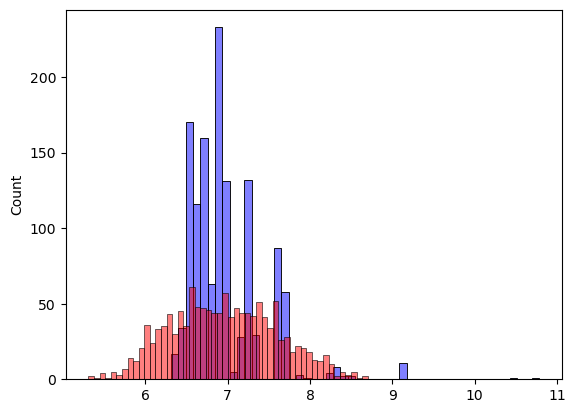

In [1317]:

# splitting the data into train, val and test data, and setting the random seed
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, seed_value=8)


# applying the filling_missing_value_o function to the data, turn it into array, and checking the shape
x_train = filling_missing_value_mean(df_train)
print('The x_train data shape',x_train.shape)
print()

# calling the pred function y = w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5
y_pred = w0 + x_train.dot(w)
print('The y_pred values:', y_pred)
print()


# calling the rmse function
rmse(y_train, y_pred).round(2)
print('The rmse value:', rmse(y_train, y_pred).round(2))

# checking the outcome of the y-pred vs the y_train
sns.histplot(y_pred, color='blue', alpha=0.5, bins=50)
sns.histplot(y_train, color='red', alpha=0.5, bins=50)

In [1318]:
# RMSE on validation data: Filling missing values with zero

# finding the missing values in the x_val data
x_val = filling_missing_value_mean(df_val)
print('The x_val data:', x_val)


# mutlipling the X_val with the w values
y_pred = w0 + x_val.dot(w)


# calling the rmse function
rmse(y_val, y_pred)
print('The rmse value:', rmse(y_val, y_pred))

The x_val data: [[   8.   512.    15.6]
 [  16.  1000.    14.2]
 [  16.   512.    13.3]
 ...
 [   8.    32.    14. ]
 [  16.   512.    14. ]
 [   8.   512.    15.6]]
The rmse value: 0.4436650072816993


#### 5.1 Dataset split with seed 9

Seed value: 9
The count of the dataset: 2160

The numpy array of the dataset indices: [   0    1    2 ... 2157 2158 2159]

Validation data: 432
Test data: 432
Training data: 1296
Total data: 2160

The x_train data shape (1296, 3)

The y_pred values: [7.65939743 6.78245732 6.70801013 ... 6.45545868 7.18408026 8.30413617]

The rmse value: 0.44


<AxesSubplot:ylabel='Count'>

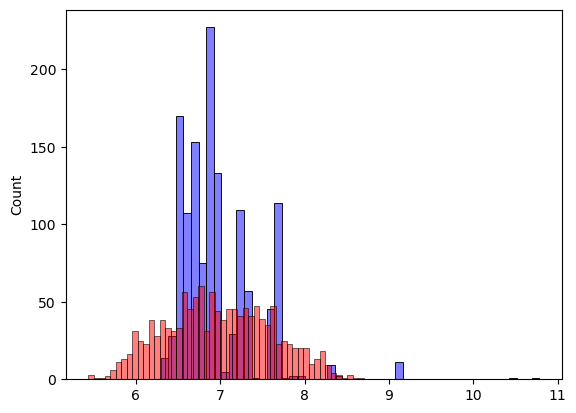

In [1319]:

# splitting the data into train, val and test data, and setting the random seed
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, seed_value=9)


# applying the filling_missing_value_o function to the data, turn it into array, and checking the shape
x_train = filling_missing_value_mean(df_train)
print('The x_train data shape',x_train.shape)
print()

# calling the pred function y = w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5
y_pred = w0 + x_train.dot(w)
print('The y_pred values:', y_pred)
print()


# calling the rmse function
rmse(y_train, y_pred).round(2)
print('The rmse value:', rmse(y_train, y_pred).round(2))

# checking the outcome of the y-pred vs the y_train
sns.histplot(y_pred, color='blue', alpha=0.5, bins=50)
sns.histplot(y_train, color='red', alpha=0.5, bins=50)

In [1320]:
# RMSE on validation data: Filling missing values with zero

# finding the missing values in the x_val data
x_val = filling_missing_value_mean(df_val)
print('The x_val data:', x_val)


# mutlipling the X_val with the w values
y_pred = w0 + x_val.dot(w)


# calling the rmse function
rmse(y_val, y_pred)
print('The rmse value:', rmse(y_val, y_pred))

The x_val data: [[ 16.  512.   14. ]
 [  8.  256.   15.6]
 [  8.  512.   15.6]
 ...
 [  8.  256.   15.6]
 [ 16.  512.   15.6]
 [ 16.  512.   15.6]]
The rmse value: 0.40550481428288027


In [1397]:
def collect_rmse_scores(df, seed_values, fill_method):
    rmse_scores = []
    
    for seed_value in seed_values:
        # Prepare the data
        df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, seed_value=seed_value)
        
        # Fill missing values
        if fill_method == 'zero':
            x_train = filling_missing_value_0(df_train)
            x_val = filling_missing_value_0(df_val)
        elif fill_method == 'mean':
            x_train = filling_missing_value_mean(df_train)
            x_val = filling_missing_value_mean(df_val)
        else:
            raise ValueError("Invalid fill method. Use 'zero' or 'mean'.")
        
        # Train the model
        w0, w = train_linear_regression(x_train, y_train)
        
        # Predict and calculate RMSE
        y_pred = w0 + x_val.dot(w)
        score = rmse(y_val, y_pred).round(2)
        
        # Collect the RMSE score
        rmse_scores.append(score)
    
    return rmse_scores

# Example usage:
seed_values = list(range(10))
fill_method = 'zero'  # or 'mean'
rmse_scores = collect_rmse_scores(df, seed_values, fill_method)
print(rmse_scores)

Seed value: 0

Seed value: 1

Seed value: 2

Seed value: 3

Seed value: 4

Seed value: 5

Seed value: 6

Seed value: 7

Seed value: 8

Seed value: 9

[0.43, 0.45, 0.45, 0.45, 0.42, 0.43, 0.45, 0.43, 0.44, 0.41]


In [1401]:
# standard deviation of the rmse scores
np.std(rmse_scores).round(3)

0.014

____

### Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [1411]:
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, seed_value=9)

Seed value: 9



In [1412]:
df_full_train = pd.concat([df_train, df_val])

In [1413]:
df_full_train = df_full_train.reset_index(drop=True)

In [1420]:
X_full_train = filling_missing_value_0(df_full_train)

In [1422]:
X_full_train

array([[  32. , 1000. ,   15.6],
       [   8. ,  512. ,   13.3],
       [   8. ,  512. ,   15.6],
       ...,
       [   8. ,  256. ,   15.6],
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   15.6]])

In [1423]:
y_full_train = np.concatenate([y_train, y_val])

In [1424]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [1425]:
x_test = filling_missing_value_0(df_test)
y_pred = w0 + x_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4553047228091104